In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
from scipy.stats import linregress


In [2]:
health_df=pd.read_csv("../resources/VAERSDATA1 (3).csv")
health_df.head()
max_age=health_df["AGE_YRS"].max()
print(max_age)

109


In [3]:
health_state = health_df.sort_values(by=["STATE","AGE_YRS"], ascending=[True,True])
health_state=health_state[health_state["AGE_YRS"]>=10]
health_state.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES
17459,1906451,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,"Pork, Peanuts"
17460,1906459,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN
17461,1906495,11/29/2021,AK,10,M,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN
17767,1944375,12/13/2021,AK,10,F,NaN,NaN,NaN,11/24/2021,11/24/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN
17768,1944576,12/13/2021,AK,10,M,NaN,NaN,NaN,11/26/2021,11/26/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN


In [4]:
bins = list(range(10, 111, 10))
labels=[f"{i}-{i+9}" for i in range(10,110,10)]
health_state["Age_Group"]=pd.cut(health_df["AGE_YRS"],bins=bins,labels=labels,right=False)
health_state.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES,Age_Group
17459,1906451,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,"Pork, Peanuts",10-19
17460,1906459,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN,10-19
17461,1906495,11/29/2021,AK,10,M,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN,10-19
17767,1944375,12/13/2021,AK,10,F,NaN,NaN,NaN,11/24/2021,11/24/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN,10-19
17768,1944576,12/13/2021,AK,10,M,NaN,NaN,NaN,11/26/2021,11/26/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN,10-19


In [5]:
health_state = health_state.sort_values(by=["Age_Group", "STATE"], ascending=[True, True])

print(health_state.head())

       VAERS_ID    RECVDATE STATE  AGE_YRS SEX DIED DATEDIED RECOVD  \
17459   1906451  11/29/2021    AK       10   F  NaN      NaN      U   
17460   1906459  11/29/2021    AK       10   F  NaN      NaN      U   
17461   1906495  11/29/2021    AK       10   M  NaN      NaN      U   
17767   1944375  12/13/2021    AK       10   F  NaN      NaN    NaN   
17768   1944576  12/13/2021    AK       10   M  NaN      NaN    NaN   

         VAX_DATE  ONSET_DATE  NUMDAYS V_ADMINBY         VAX_MANU HISTORY  \
17459  11/10/2021  11/10/2021      0.0       PVT  PFIZER\BIONTECH     NaN   
17460  11/10/2021  11/10/2021      0.0       PVT  PFIZER\BIONTECH     NaN   
17461  11/10/2021  11/10/2021      0.0       PVT  PFIZER\BIONTECH     NaN   
17767  11/24/2021  11/24/2021      0.0       PUB  PFIZER\BIONTECH     NaN   
17768  11/26/2021  11/26/2021      0.0       PUB  PFIZER\BIONTECH     NaN   

           ALLERGIES Age_Group  
17459  Pork, Peanuts     10-19  
17460            NaN     10-19  
17461      

In [6]:
# health_wrob_age=health_wrob_state.sort_values(by=["Age_Group"],ascending=True)
# health_wrob_age.drop(columns=["Age Group"], inplace=True)
# health_wrob_age.head()

In [7]:
print(health_state.columns.tolist())
grouped_data = health_state.groupby(["Age_Group", "STATE"]).size().reset_index(name="Count")

print(grouped_data)

['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'V_ADMINBY', 'VAX_MANU', 'HISTORY', 'ALLERGIES', 'Age_Group']
    Age_Group STATE  Count
0       10-19    AK    168
1       10-19    AL    378
2       10-19    AR    283
3       10-19    AS      6
4       10-19    AZ    949
..        ...   ...    ...
645   100-109    WV      1
646   100-109    WY      0
647   100-109    XB      0
648   100-109    XL      0
649   100-109    XV      0

[650 rows x 3 columns]


C:\Users\wrobe\AppData\Local\Temp\ipykernel_30044\1977756188.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = health_state.groupby(["Age_Group", "STATE"]).size().reset_index(name="Count")


In [8]:
removed_states=["GU","VI","AS","MP","XB","FM","MH","QM","PW","QW","XV","XL", "Ca","DC"]
states_only=health_state[~health_state["STATE"].isin(removed_states)]

In [9]:
state_counts = states_only["STATE"].value_counts()
total_count= states_only["VAERS_ID"].count()
print(state_counts)
print(total_count)

STATE
CA    86225
TX    46958
NY    44953
FL    44930
MI    34663
PA    29114
IN    27386
IL    25977
OH    25763
NJ    23413
CO    22277
WA    21800
NC    20624
MN    20527
MA    20518
VA    19838
GA    18989
AZ    18307
MD    16281
WI    15346
TN    13211
MO    13085
KY    12875
OR    11643
CT    10809
OK     8432
SC     8418
AL     7261
IA     6599
KS     6136
LA     6066
NV     5812
UT     5690
AR     5580
PR     5134
NM     5036
NH     4346
ME     4307
NE     4278
ID     4259
MS     3792
MT     3472
WV     3280
HI     3211
RI     2878
AK     2446
VT     2404
DE     2320
SD     1886
ND     1783
WY     1150
Name: count, dtype: int64
876802


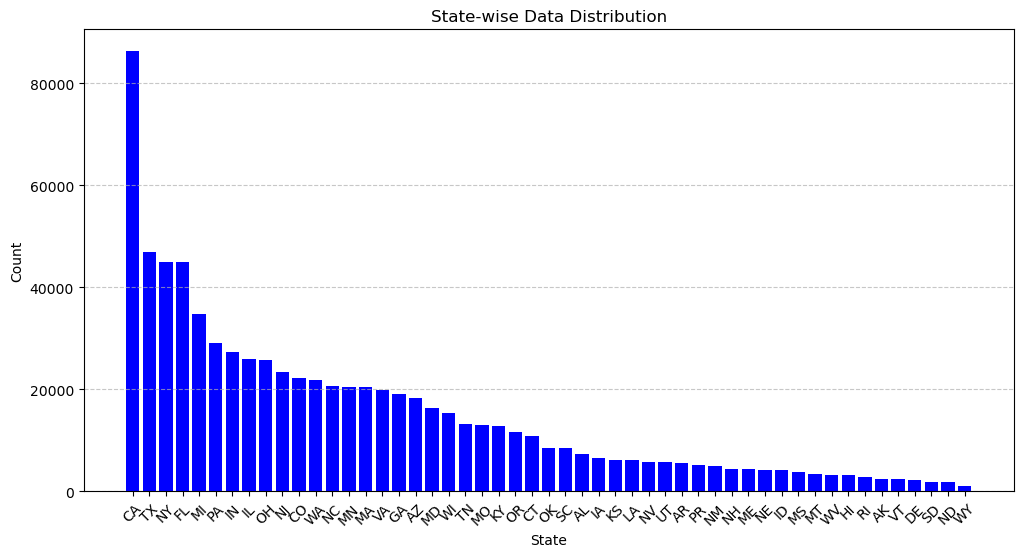

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(state_counts.index, state_counts.values, color="blue")

plt.title("State-wise Data Distribution")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [11]:
state_age_group=states_only.groupby(["Age_Group", "STATE"]).size().reset_index(name="Count")
state_age_group.head()

C:\Users\wrobe\AppData\Local\Temp\ipykernel_30044\3527029308.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_age_group=states_only.groupby(["Age_Group", "STATE"]).size().reset_index(name="Count")


,Age_Group,STATE,Count
0,10-19,AK,168
1,10-19,AL,378
2,10-19,AR,283
3,10-19,AZ,949
4,10-19,CA,6157


In [18]:
state_age_group.hvplot.bar(
    x="Age_Group",
    y="Count",
    by="STATE",
    title="Age Group Distribution by State",
    xlabel="Age Group",
    ylabel="Count",
    rot=45, 
    width=900,
    height=500,
    stacked=True
)
plt.savefig("../Images/state_stacked.png")


<Figure size 640x480 with 0 Axes>

In [13]:
state_ms=state_age_group[state_age_group["STATE"]== "MS"]
state_ms.hvplot.bar(
    x="Age_Group",
    y="Count",
    
    title="Age Group Distribution Mississippi",
    xlabel="Age Group",
    ylabel="Count",
    rot=45, 
    width=900,
    height=500,
    color="red"
)

:Bars   [Age_Group]   (Count)